### Zadania
 
1. Uruchomić 
   - naive_multiplication(A,B), 
   - better_multiplication(A,B) 
   - mnożenie BLAS w Julii (A*B) 

    dla coraz większych macierzy kwadratowych i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie. (1pkt)

In [1]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
    for i=1:size(A,1)
        for j=1:size(B,2)
            for k=1:size(A,2)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
C
end

naive_multiplication (generic function with 1 method)

In [2]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
    for j=1:size(B,2)
        for k=1:size(A,2)
            for i=1:size(A,1)
                C[i,j]=C[i,j]+A[i,k]*B[k,j]
            end
        end
    end
C
end

better_multiplication (generic function with 1 method)

In [3]:
function BLAS_multiplication( A,B )
    return A*B
end

BLAS_multiplication (generic function with 1 method)

In [4]:
using DataFrames
df = DataFrame(label=[], size=[],  total_time=[])

M = 10

a = 5

for k=1:M
    

    
    r =  1:1:a
    A = rand(a,a)
    B = rand(a,a)

    if k==1
        
        t1 = @elapsed naive_multiplication(A,B)
        
        t2 = @elapsed better_multiplication(A,B)

        t3 = @elapsed BLAS_multiplication(A,B)

        

    end
    
    
    for k=1:M


        t1 = @elapsed naive_multiplication(A,B)
        insert!.(eachcol(df), 1, ["naive", a, t1])
        
        t2 = @elapsed better_multiplication(A,B)
        insert!.(eachcol(df), 1, ["better", a, t2])

        t3 = @elapsed BLAS_multiplication(A,B)
        insert!.(eachcol(df), 1, ["BLAS", a, t3])

        
    end
    a +=5
    
end
df;

In [5]:
using Statistics
ndf = DataFrame()
gdf1 = groupby(df, :label)
for i in 1:3
    gdf2 = groupby(gdf1[i], :size)
    for j in 1:M
        row = combine(gdf2[j],"label", "size",  "total_time" => mean, "total_time" => std)
        push!(ndf, row[1,:])
    end
end
ndf

,label,size,total_time_mean,total_time_std
,String,Int64,Float64,Float64
1,BLAS,50,1.182e-5,3.73506e-6
2,BLAS,45,8.89e-6,1.06609e-6
3,BLAS,40,6.25e-6,1.96257e-6
4,BLAS,35,5.65e-6,1.42848e-6
5,BLAS,30,3.55e-6,4.76678e-7
6,BLAS,25,3.35e-6,3.02113e-6
7,BLAS,20,1.49e-6,2.18327e-7
8,BLAS,15,1.31e-6,3.60401e-7
9,BLAS,10,5.3e-7,1.82878e-7


In [6]:
plot_ndf = groupby(ndf, :label);

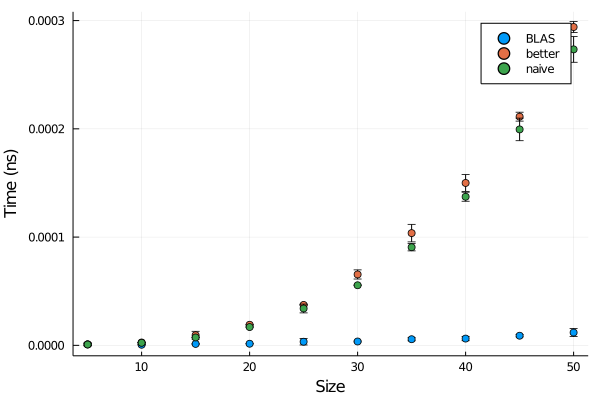

In [7]:
using Plots
plot1 = scatter(plot_ndf[1].size, plot_ndf[1].total_time_mean, yerr=plot_ndf[1].total_time_std, label="BLAS", xlabel="Size",ylabel="Time (ns)")
plot1 = scatter!(plot_ndf[2].size, plot_ndf[2].total_time_mean, yerr=plot_ndf[2].total_time_std, label="better", xlabel="Size",ylabel="Time (ns)")
plot1 = scatter!(plot_ndf[3].size, plot_ndf[3].total_time_mean, yerr=plot_ndf[3].total_time_std, label="naive", xlabel="Size",ylabel="Time (ns)")

2. Napisać w języku C:
   - naiwną metodę mnożenia macierzy kwadratowych (wersja 1) 
   - ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy(wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
   - skorzystać z  możliwości BLAS poziom 3 dostępnego w GSL  (przykład uzycia https://www.gnu.org/software/gsl/doc/html/blas.html#examples )
    
    Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu. (1 pkt)

3. Użyć funkcji polyfit  z pakietu  Polynomials   do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych  wykresów. (1 pkt)

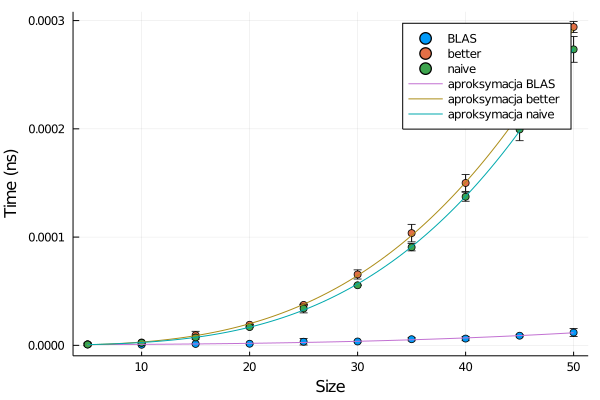

In [8]:
using Polynomials

naive =fit(plot_ndf[1].size, plot_ndf[1].total_time_mean, 3)
plot1 = plot!(naive,  extrema(plot_ndf[1].size)..., label="aproksymacja BLAS")

naive =fit(plot_ndf[2].size, plot_ndf[2].total_time_mean, 3)
plot1 = plot!(naive,  extrema(plot_ndf[2].size)..., label="aproksymacja better")

naive =fit(plot_ndf[3].size, plot_ndf[3].total_time_mean, 3)
plot1 = plot!(naive,  extrema(plot_ndf[3].size)..., label="aproksymacja naive")

4. Pokazać zniwelowanie efektu Rungego  poprzez użycie wsparcia dla wielomianów Czebyszewa w pakiecie Polynomials. Wymagany wykres. (1 pkt)

In [9]:
xs =  -1:0.2:1
ys = [rand() for x in xs]

f = fit(xs, ys);

l = zeros(Int32,12)
l[12] = 1
c = ChebyshevT(l)

roots = Polynomials.roots(c)

f2 = fit(roots, ys);


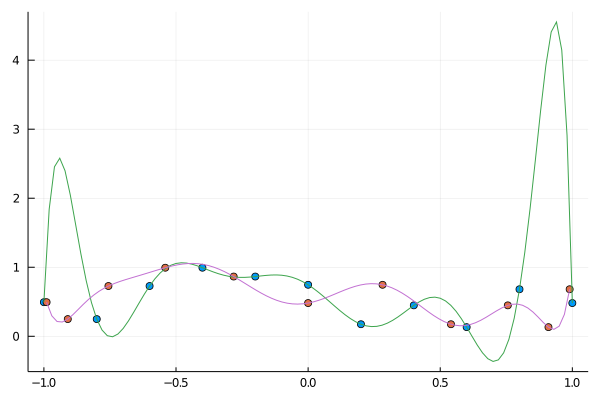

In [10]:
using Plots
plot2 = scatter(xs,ys, legend=false)
plot2 = scatter!(roots,ys)
plot2 = plot!(f, extrema(xs)...)
plot2 = plot!(f2, extrema(roots)...)

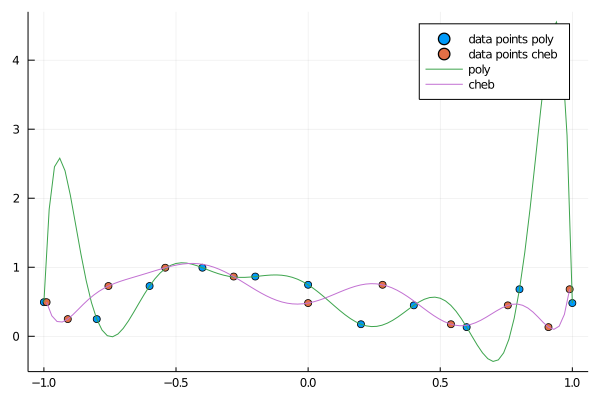

In [11]:
plot3 = scatter(xs,ys, label="data points poly")
plot3 = scatter!(roots,ys, label="data points cheb")
plot3 = plot!(f, extrema(xs)..., label="poly")
plot3 = plot!(f2, extrema(roots)..., label="cheb")

5. Przybliżenie Pade jest często lepsze niż rozwinięcie w szereg Taylora przy aproksymowaniu funkcji, które posiadają osobliwości. Korzystając ze wsparcia dla aproksymacji Pade w pakiecie Polynomials pokazać dowolny przykład (wraz z wykresem), gdzie takie przybliżenie faktycznie jest lepsze. Można odtworzyć wykres z wykładu albo zainspirować się przykładowym artykułem https://www.hindawi.com/journals/ijcm/2014/587430/ (1 pkt)

In [12]:
F(x) = (7+(1+x)^(4/3))^(1/3)

F (generic function with 1 method)

In [13]:
# using Pkg; Pkg.add("TaylorSeries")
using TaylorSeries

t = Taylor1(Float64, 4)

myfunc = F(t)
T=Polynomial(myfunc.coeffs)

pade=Polynomials.PolyCompat.PadeApproximation.Pade(T, 2, 2)

xs =  1:1:5
ysF = [F(x) for x in xs]


ysP = [pade(x) for x in xs];


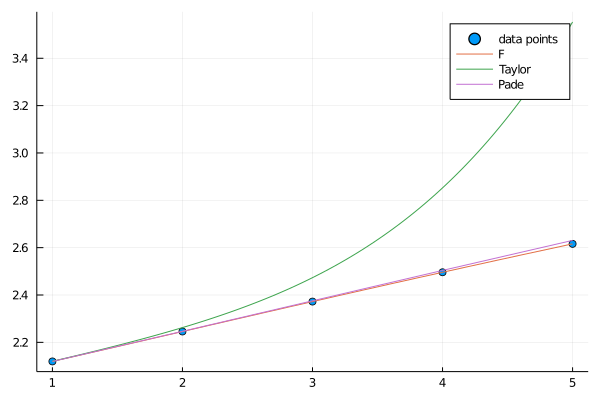

In [14]:
plot4 = scatter(xs,ysF, label="data points")
plot4 = plot!(F, extrema(xs)..., label="F")
plot4 = plot!(T, extrema(xs)..., label="Taylor")
plot4 = plot!(xs, ysP, label="Pade")
